Análise exploratória da tabela McDonald's_nutrition para a
estrutura de dados DF usando o método read_SQL.
Foram feitas algumas análises básicas de dados usando
Python para descobrir quais alimentos do cardápio têm
teor máximo de sódio.

In [ ]:
import ibm_db

In [2]:
dsn_hostname = "your_hostname"
dsn_uid = "your_uid"
dsn_pwd = "your_pwd"

dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "bludb"
dsn_port = "your_port"
dsn_protocol = "TCPIP"
dsn_security = "SSL"

In [3]:
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};"
    "SECURITY={7};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd,dsn_security)

In [ ]:
try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg()

In [5]:
stmt = ibm_db.exec_immediate(conn, "SELECT count (*) FROM MC_DONALDS")
ibm_db.fetch_both(stmt)

{'1': 260, 0: 260}

In [6]:
import pandas as pd
import ibm_db_dbi

pconn = ibm_db_dbi.Connection(conn)
select = "select * from MC_DONALDS"

df = pd.read_sql(select, pconn)

df.CATEGORY[0]

/var/folders/zc/8nsj181d6yd80h_gyt0wy3rh0000gn/T/ipykernel_19750/1552824876.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(select, pconn)


'Breakfast'

In [7]:
df.head(5)

,CATEGORY,ITEM,SERVING_SIZE,CALORIES,CALORIES_FROM_FAT,TOTAL_FAT,TOTAL_FAT____DAILY_VALUE_,SATURATED_FAT,SATURATED_FAT____DAILY_VALUE_,TRANS_FAT,...,CARBOHYDRATES,CARBOHYDRATES____DAILY_VALUE_,DIETARY_FIBER,DIETARY_FIBER____DAILY_VALUE_,SUGARS,PROTEIN,VITAMIN_A____DAILY_VALUE_,VITAMIN_C____DAILY_VALUE_,CALCIUM____DAILY_VALUE_,IRON____DAILY_VALUE_
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

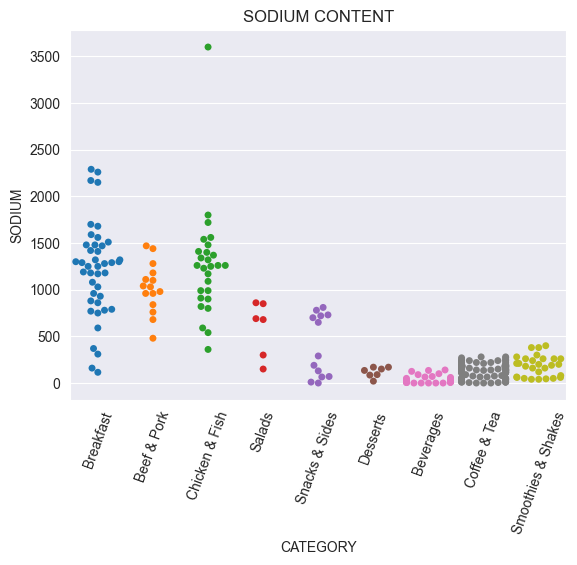

In [9]:
plot = sns.swarmplot(x='CATEGORY', y='SODIUM', data=df)
plt.setp(plot.get_xticklabels(), rotation=70)
plt.title('SODIUM CONTENT')
plt.show()

In [10]:
df['SODIUM'].describe()

count     260.000000
mean      495.750000
std       577.026323
min         0.000000
25%       107.500000
50%       190.000000
75%       865.000000
max      3600.000000
Name: SODIUM, dtype: float64

In [11]:
df['SODIUM'].idxmax()

82

In [12]:
df.at[82,'ITEM']

'Chicken McNuggets (40 piece)'

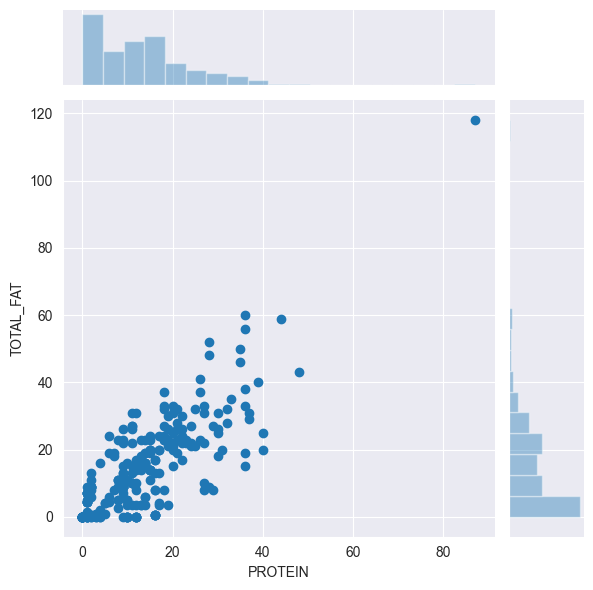

In [13]:
plot = sns.jointplot(x='PROTEIN', y='TOTAL_FAT', data=df)
plot

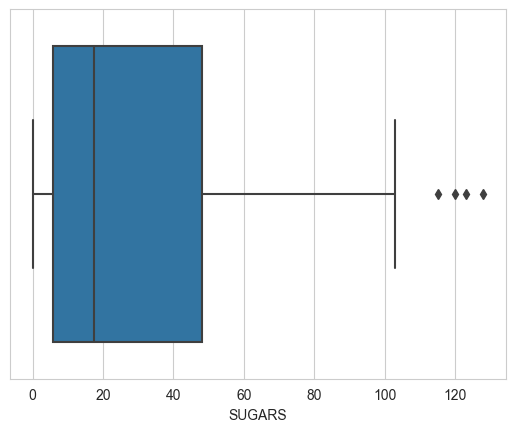

In [14]:
plot = sns.set_style('whitegrid')
ax = sns.boxplot(x=df['SUGARS'])
plot

In [15]:
ibm_db.close(conn)

True